# Analysis of data

Here we can look at different datasets and explore them a bit, seeing what the data holds

## Azaan's explorations

In [2]:
# to install a package just do: !pip install [package_name]
# !pip install pandas
# !pip install pillow

In [3]:
# view multimodel dataset
import zipfile
import shutil
import os
filepath = 'datasets/multimodal-deep-learning-disaster-response-mouzannar (1).zip'

# with zipfile.ZipFile(filepath, 'r') as zip_ref:
#     zip_ref.extractall('multimodal_data')

# shutil.move('multimodal_data', 'datasets/multimodal_data')
# os.remove("multimodal_data")

##
# after looking the files, there are 6 folders with both images and attached text files
# does not seem that useful to us at the moment, unless we want to process images which
# I don't think we need to do

In [32]:
# view weather datasets
# I gathered from https://scacis.rcc-acis.org/
# Product Selection -> daily data listing
# Option selection -> start date 3/1/2000 -- 3/1/2023
# Station/Area -> los angeles (USC) and san francisco (downtown)

import pandas as pd

la_df = pd.read_csv('datasets/weather_data/Los_Angeles_March_2020-2023.csv')
sf_df = pd.read_csv('datasets/weather_data/San_Francisco_March_2020-2023.csv')

In [33]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print(la_df.head())
print(sf_df.head())

# So we have good weather data from this site, I think we can use any other data
# that has a similar range and try to correlate them
# For instance, fire data vs temperatre rises in the last 20 year --> global warming affect

         Date  MaxTemperature  MinTemperature  AvgTemperature  AtObsTemperature  Precipitation  Snowfall  SnowDepth
0  2000-03-01              65              48            56.5                 M           0.00         M          M
1  2000-03-02              70              46            58.0                 M           0.00         M          M
2  2000-03-03              62              50            56.0                 M           0.28         M          M
3  2000-03-04              57              49            53.0                 M           0.07         M          M
4  2000-03-05              56              45            50.5                 M           1.71         M          M
         Date  MaxTemperature  MinTemperature  AvgTemperature  AtObsTemperature  Precipitation  Snowfall  SnowDepth
0  2000-03-01              62              45            53.5                 M           0.00         M          M
1  2000-03-02              56              48            52.0           

In [34]:
# some summary statistics to look at the data
la_df.describe()

,Date,MaxTemperature,MinTemperature,AvgTemperature,AtObsTemperature,Precipitation,Snowfall,SnowDepth
count,8402,8402,8402,8402,8402,8402,8402,8402
unique,8402,60,46,93,1,162,2,2
top,2000-03-01,80,63,69.5,M,0.00,0.0,M
freq,1,359,495,225,8402,7367,6010,4267


In [35]:
# some strings in column, get rid and see mean
cols=[i for i in la_df.columns if i not in ["Date"]]
for col in cols:
    la_df[col]=pd.to_numeric(la_df[col], errors='coerce')

la_df

,Date,MaxTemperature,MinTemperature,AvgTemperature,AtObsTemperature,Precipitation,Snowfall,SnowDepth
0,2000-03-01,65.0,48.0,56.5,NaN,0.00,NaN,NaN
1,2000-03-02,70.0,46.0,58.0,NaN,0.00,NaN,NaN
2,2000-03-03,62.0,50.0,56.0,NaN,0.28,NaN,NaN
3,2000-03-04,57.0,49.0,53.0,NaN,0.07,NaN,NaN
4,2000-03-05,56.0,45.0,50.5,NaN,1.71,NaN,NaN
...,...,...,...,...,...,...,...,...
8397,2023-02-26,56.0,40.0,48.0,NaN,0.07,NaN,NaN
8398,2023-02-27,53.0,47.0,50.0,NaN,0.42,NaN,NaN
8399,2023-02-28,58.0,45.0,51.5,NaN,0.94,NaN,NaN
8400,2023-03-01,57.0,49.0,53.0,NaN,0.27,NaN,NaN


In [36]:
la_df[' AvgTemperature']
la_df[' MinTemperature']

0       48.0
1       46.0
2       50.0
3       49.0
4       45.0
        ... 
8397    40.0
8398    47.0
8399    45.0
8400    49.0
8401     NaN
Name:  MinTemperature, Length: 8402, dtype: float64

In [37]:
# drop NaN from the temp columns
la_df = la_df[la_df[' AvgTemperature'].notna()]
la_df
la_df.mean(axis=0)

C:\Users\azaan\AppData\Local\Temp\ipykernel_164304\1385151588.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  la_df.mean(axis=0)


 MaxTemperature      75.285714
 MinTemperature      56.844524
 AvgTemperature      66.065119
 AtObsTemperature          NaN
 Precipitation        0.036955
 Snowfall             0.000000
 SnowDepth            0.000000
dtype: float64

In [38]:
la_df[' MaxTemperature'].isna().sum()
la_df[' AvgTemperature'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       56.5
1       58.0
2       56.0
3       53.0
4       50.5
        ... 
8396    47.5
8397    48.0
8398    50.0
8399    51.5
8400    53.0
Name:  AvgTemperature, Length: 8400, dtype: float64>

In [42]:
k = pd.to_datetime(la_df['Date'])
k

0      2000-03-01
1      2000-03-02
2      2000-03-03
3      2000-03-04
4      2000-03-05
          ...    
8396   2023-02-25
8397   2023-02-26
8398   2023-02-27
8399   2023-02-28
8400   2023-03-01
Name: Date, Length: 8400, dtype: datetime64[ns]

C:\Users\azaan\AppData\Local\Temp\ipykernel_164304\1656726982.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_df['Date'] = pd.to_datetime(la_df['Date'])


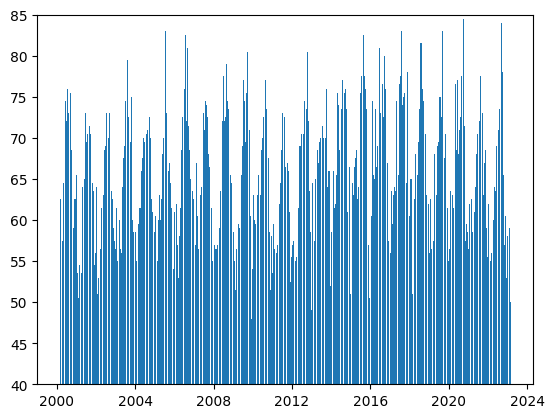

In [52]:
# see some histograms on some columns
import matplotlib.pyplot as plt
import matplotlib.dates

# need to convert date to datetime to do this
la_df['Date'] = pd.to_datetime(la_df['Date'])

# plt.hist(la_df[' AvgTemperature'])
fig, ax = plt.subplots()
ax.bar(la_df['Date'], la_df[' AvgTemperature'])
ax.set_ylim([40,85])
plt.show()

Did some exploring on the data, I want ot look more at the sanfran data too. We can get more data around the USA just let me know.\
Also, the data you guys try and find let's see if we can concatonate it with my data and we can come up with a correlation of some sort.\
When you guys find a dataset, just put  it into the datasets folder\
If you guys want to look at more cool things with the above data go ahead!